In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA 

# Data

In [92]:
train_columns = ['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current',	'motor_rpm', 'motor_temp', 'motor_vibe', 'type']

In [103]:
train = pd.read_csv('train_data.csv', names=train_columns)
train.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
1,1.59,41.0,0.7,20.53,1680.0,58.67,2.93,0
2,2.97,59.28,0.7,38.4,3142.0,74.91,3.75,0
3,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
4,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0


In [79]:
test_columns = ['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current',	'motor_rpm', 'motor_temp', 'motor_vibe', 'type']

In [105]:
test = pd.read_csv('test_data.csv', names=test_columns)
test.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
1,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0
2,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0
3,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0
4,2.2,49.15,0.7,28.5,2332.0,65.91,3.3,0


# Isolation Forest

In [80]:
train_model = IsolationForest(n_estimators=150, 
                              max_samples="auto",
                              contamination=0.1,
                              verbose=0)
train_model.fit(train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=150,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [81]:
train_pred = train_model.predict(train)
train['anomaly'] = train_pred
print(train['anomaly'].value_counts())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


 1    2216
-1     247
Name: anomaly, dtype: int64


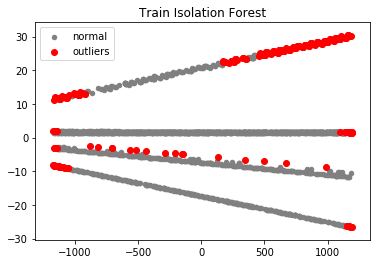

In [82]:
outliers = train.loc[train.anomaly == -1]
ourlier_index = list(outliers.index)

pca = PCA(2)
pca.fit(train)
res = pd.DataFrame(pca.transform(train))

plt.title("Train Isolation Forest")
b1 = plt.scatter(res[0], res[1], c='gray', s=20, label='normal')
b1 = plt.scatter(res.iloc[ourlier_index, 0], res.iloc[ourlier_index, 1], c='red', edgecolor='red', label='outliers')
plt.legend(loc='upper left')
plt.show()

In [83]:
test_model = IsolationForest(n_estimators=200, 
                             max_samples=256,
                             verbose=0)
test_model.fit(test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples=256, n_estimators=200,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [84]:
test_pred = test_model.predict(test)
test['anomaly'] = test_pred
print(test['anomaly'].value_counts())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


 1    6650
-1     739
Name: anomaly, dtype: int64


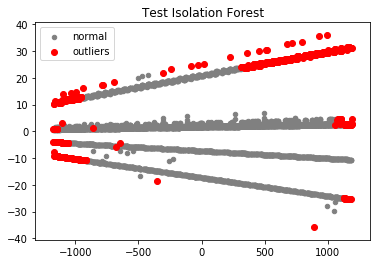

In [85]:
outliers = test.loc[test.anomaly == -1]
ourlier_index = list(outliers.index)

pca = PCA(2)
pca.fit(test)
res = pd.DataFrame(pca.transform(test))

plt.title("Test Isolation Forest")
b1 = plt.scatter(res[0], res[1], c='gray', s=20, label='normal')
b1 = plt.scatter(res.iloc[ourlier_index, 0], res.iloc[ourlier_index, 1], c='red', edgecolor='red', label='outliers')
plt.legend(loc='upper left')
plt.show()

In [86]:
submit = pd.read_csv('dataset/answer_sample.csv')
submit['label'] = submit['label'].map( {1: 0, -1: 1} )

submit['label'] = test_pred
print(submit['label'].value_counts())

 1    6650
-1     739
Name: label, dtype: int64


## Submission

In [87]:
def get_pred_label(train_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량) 이므로 (0:정상, 1:불량)로 Label 변환
    train_pred = np.where(train_pred == 1, 0, train_pred)
    train_pred = np.where(train_pred == -1, 1, train_pred)
    return train_pred

In [88]:
test_pred = get_pred_label(test_pred)

In [89]:
submit = pd.read_csv('dataset/answer_sample.csv')

In [90]:
submit['label'] = test_pred
print(submit['label'].value_counts())
submit

0    6650
1     739
Name: label, dtype: int64


,type,label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
7384,7,0
7385,7,0
7386,7,0
7387,7,0
